# Experiment Code for Project

Jordan Perr-Sauer
11/29/2021

In [31]:
import sys
sys.path.append("./OpenOA/examples")

import operational_analysis
print("OpenOA Version: ", operational_analysis.__file__, operational_analysis.__version__)
from operational_analysis.methods import plant_analysis

from project_ENGIE import Project_Engie
from tqdm import tqdm

import pandas as pd

import itertools

import time

import seaborn as sns

import matplotlib.pyplot as plt

OpenOA Version:  /Users/jperrsau/cu-src/appm5650/project/OpenOA/operational_analysis/__init__.py 2.2


In [5]:
project = Project_Engie('./OpenOA/examples/data/la_haute_borne')
project.prepare()

INFO:project_ENGIE:Loading SCADA data
INFO:operational_analysis.types.timeseries_table:Loading name:la-haute-borne-data-2014-2015
INFO:project_ENGIE:SCADA data loaded
INFO:project_ENGIE:Timestamp QC and conversion to UTC
INFO:project_ENGIE:Correcting for out of range of temperature variables
INFO:project_ENGIE:Flagging unresponsive sensors
INFO:project_ENGIE:Converting field names to IEC 61400-25 standard
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:plant_data
INFO:operational_analysis.types.timeseries_table:Loading name:merra2_la_haute_borne
INFO:operational_analysis.types.timeseries_table:Loading name:era5_wind_la_haute_borne


In [41]:
def experiment(num_sim, regression_frac, qmc, repetition):
    start_time = time.perf_counter()

    pa = plant_analysis.MonteCarloAEP(project,
                                    reanal_products = ['era5', 'merra2'],
                                    regression_frac=regression_frac,
                                    qmc=qmc)
    pa.run(num_sim=num_sim, reanal_subset=['era5', 'merra2'])

    total_time = time.perf_counter() - start_time

    mean,std = pa.results["aep_GWh"].mean(), pa.results["aep_GWh"].std()

    res = {
        "num_sim":num_sim,
        "regression_frac":regression_frac,
        "qmc":qmc,
        "repetition": repetition,
        "time": total_time,
        "AEP mean": mean,
        "AEP stdev": std,
    }

    return res

In [ ]:

num_sim = [128] #[128, 512]
regression_frac = [1.0] #[0.1, 1.0]
qmc = [True, False]
repetitions = range(30)

p = itertools.product(num_sim,regression_frac,qmc,repetitions)
results = list(map(lambda x: experiment(*x), p))

df = pd.DataFrame(results)
#df

Text(0.5, 1.0, 'AEP Stdev')

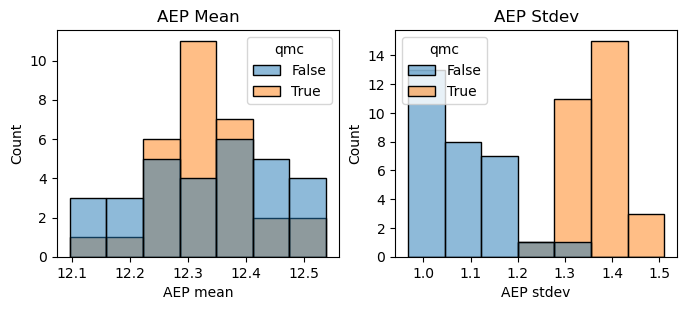

In [37]:
plt.figure(figsize=(8,3),dpi=100)

plt.subplot(1,2,1)
sns.histplot(data=df, x="AEP mean", hue="qmc")
plt.title("AEP Mean")

plt.subplot(1,2,2)
sns.histplot(data=df, x="AEP stdev", hue="qmc")
plt.title("AEP Stdev")

In [ ]:

num_sim = [128] #[128, 512]
regression_frac = [0.1, 1.0] #[0.1, 1.0]
qmc = [False]
repetitions = range(30)

p = itertools.product(num_sim,regression_frac,qmc,repetitions)
results = list(map(lambda x: experiment(*x), p))

df = pd.DataFrame(results)
#df

Text(0.5, 1.0, 'AEP Stdev')

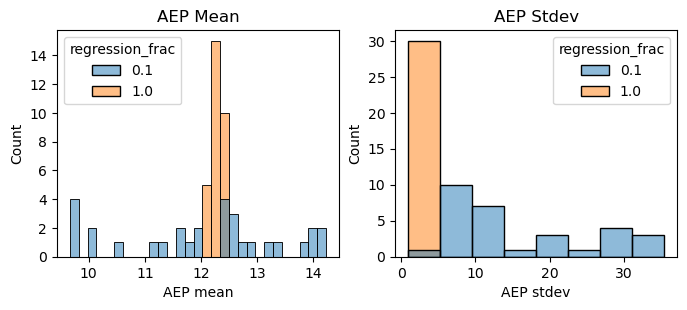

In [45]:
plt.figure(figsize=(8,3),dpi=100)

df["regression_frac"] = df["regression_frac"].astype("str")

plt.subplot(1,2,1)
sns.histplot(data=df, x="AEP mean", hue="regression_frac")
plt.title("AEP Mean")

plt.subplot(1,2,2)
sns.histplot(data=df, x="AEP stdev", hue="regression_frac")
plt.title("AEP Stdev")